In [1]:
# Utils
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

# Representation
import nltk
from nltk.corpus import stopwords
# from sklearn.base import TransformerMixin
# from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.preprocessing import Normalizer
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.decomposition import TruncatedSVD

import re, sys, unidecode
import wordbatch
from wordbatch.extractors import WordBag, WordHash
from wordbatch.models import FTRL

/root/anaconda3/lib/python3.6/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so | _pywrap_tensorflow_internal


In [2]:
dfNoticias = pd.read_pickle("dfNoticias")

In [3]:
dfNoticias.head()

,Cuerpo,Fecha,Hora,ID,Resumen,Seccion_1,Seccion_2,Seccion_3,Subtema_1,Subtema_2,Subtema_3,Tema_1,Tema_2,Tema_3,Titular,Type
1,\nMarcel Granollers (44°) sorprendió a David F...,20140929,09:57,20140929095927,\nEl español cayó ante su compatriota Marcel G...,Deportes,None,None,Torneos ATP,None,None,Tenis,None,None,\nDavid Ferrer sufrió otra temprana eliminación\n,fid_noticia
2,\nEl Gobierno de Barack Obama ha enviado cuatr...,20140929,07:03,20140929065051,\nLas conversaciones comenzaron el año 2010 y ...,País,Mundo,Mundo,EE.UU.,Relaciones Exteriores,None,Relaciones Exteriores,EE.UU.,Cuba,\nObama ha enviado cuatro solicitudes a Chile ...,fid_noticia
3,\nEste miércoles la Comisión Asesora Presidenc...,20140929,11:37,20140929105234,\nRepresentantes del sector privado acusaron q...,País,None,None,Isapre,None,None,Salud,None,None,\nQuiebre en comisión presidencial de isapres ...,fid_noticia
4,"\nWolfgang Burmann, del Team Avanti, se adjudi...",20140929,10:05,20140929100825,\nEl pedalero del equipo Avanti terminó en el ...,Deportes,None,None,Chilenos,None,None,Ciclismo,None,None,\nWolfgang Burmann ganó el segundo clasificato...,fid_noticia
5,"\nWolfgang Burmann, del Team Avanti, se adjudi...",20140929,10:05,20140929130450,\nEl pedalero del equipo Avanti terminó en el ...,Deportes,None,None,Chilenos,None,None,Ciclismo,None,None,\nWolfgang Burmann ganó el segundo clasificato...,fid_noticia


In [4]:
print('Selecting useful information...', end='')
_map = {}
_map["Cuerpo"] = []
_map["Seccion"] = []

for index, row in dfNoticias.iterrows():
    if (row["Seccion_1"] != None and row["Cuerpo"] != None):
        _map["Cuerpo"].append(row["Cuerpo"]) 
        _map["Seccion"].append(row["Seccion_1"])
    
#     if (row["Seccion_2"] != None and row["Cuerpo"] != None):
#         _map["Cuerpo"].append(row["Cuerpo"]) 
#         _map["Seccion"].append(row["Seccion_2"])
        
#     if (row["Seccion_3"] != None and row["Cuerpo"] != None):
#         _map["Cuerpo"].append(row["Cuerpo"]) 
#         _map["Seccion"].append(row["Seccion_3"])
        
print('done.')

Selecting useful information...done.


In [5]:
print(_map["Seccion"])

['Deportes', 'País', 'País', 'Deportes', 'Deportes', 'País', 'Deportes', 'País', 'País', 'País', 'País', 'Deportes', 'País', 'Deportes', 'País', 'País', 'País', 'País', 'Deportes', 'Entretención', 'Entretención', 'Mundo', 'Deportes', 'Deportes', 'País', 'País', 'País', 'Deportes', 'Economía', 'Entretención', 'Entretención', 'Entretención', 'País', 'País', 'Deportes', 'Deportes', 'Deportes', 'País', 'País', 'Economía', 'País', 'Deportes', 'Deportes', 'Entretención', 'Entretención', 'País', 'Deportes', 'Deportes', 'Deportes', 'Entretención', 'País', 'Deportes', 'País', 'Mundo', 'Economía', 'Deportes', 'Mundo', 'Deportes', 'País', 'País', 'País', 'Mundo', 'País', 'País', 'País', 'Mundo', 'Deportes', 'Deportes', 'Deportes', 'Economía', 'Entretención', 'Economía', 'País', 'Deportes', 'Deportes', 'Economía', 'Economía', 'Entretención', 'País', 'Deportes', 'Deportes', 'Deportes', 'Entretención', 'País', 'Mundo', 'Mundo', 'País', 'País', 'País', 'Mundo', 'Entretención', 'Economía', 'Deportes',

In [6]:
df = pd.DataFrame(_map)
numberOfDuplicates = df.shape[0]
print('Number of data before dropping duplicates: {}'.format(df.shape[0]))
df = df.drop_duplicates(inplace= False)
df.reset_index(drop=True, inplace= True)
numberOfDuplicates -= df.shape[0]
print('Number of data after dropping duplicates : {}'.format(df.shape[0]))
print('\nNumber of duplicated data : {}'.format(numberOfDuplicates))


Number of data before dropping duplicates: 250339
Number of data after dropping duplicates : 238909

Number of duplicated data : 11430


In [7]:
df.head()

,Cuerpo,Seccion
0,\nMarcel Granollers (44°) sorprendió a David F...,Deportes
1,\nEl Gobierno de Barack Obama ha enviado cuatr...,País
2,\nEste miércoles la Comisión Asesora Presidenc...,País
3,"\nWolfgang Burmann, del Team Avanti, se adjudi...",Deportes
4,"\nEl Gobierno, a través de Sernapesca, present...",País


In [8]:
X_untransformed = df['Cuerpo'].reset_index(drop=True)
y_untransformed = df['Seccion'].reset_index(drop=True)

assert X_untransformed.shape[0] == y_untransformed.shape[0], 'X and y dimenssion must be the same.'
print('Number of data: {}'.format(X_untransformed.shape[0]))

Number of data: 238909


In [9]:
classes = df.groupby('Seccion')['Cuerpo'].nunique()

print(classes)
nClasses = classes.shape[0]
print('\nNumber of classes: {}'.format(nClasses))

Seccion
Corporativo        82
Cultura          3128
Deportes        76458
Economía         6750
Entretención    29438
Mundo           31664
País            75180
Sociedad         9079
Tecnología       7130
Name: Cuerpo, dtype: int64

Number of classes: 9


# Data Representation

## Input

In [10]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
spanish_stopwords = stopwords.words('spanish')
def normalize_text(text):
    return u" ".join([x for x in [y for y in text.lower().strip().split(" ")] 
                      if len(x) > 1 and x not in spanish_stopwords])

X_untransformed = X_untransformed
n_docs = X_untransformed.shape[0]
n_cpu = 20

batch_size = int(n_docs/n_cpu)

wb = wordbatch.WordBatch(normalize_text, 
                         extractor=(WordBag, {"hash_ngrams": 1, "hash_ngrams_weights": [1.0, 1.0],
                                              "hash_size": 2**28, "norm": "l2", "tf": 1.0,
                                              "idf": 1.0}), procs=n_cpu, n_words=1000, minibatch_size=batch_size)
wb.dictionary_freeze = True
word_comment = wb.fit_transform(list(X_untransformed),reset= False)
X_transformed = word_comment[:, np.array(np.clip(word_comment.getnnz(axis=0) - 1, 0, 1), dtype = bool)]

Normalize text
Extract wordbags


In [12]:
# dense_transformer = DenseTransformer()
# X_train = dense_transformer.fit_transform(X_sparse)
X = X_transformed
print('Number of features: {}'.format(X.shape[1]))

Number of features: 1000


In [13]:
# import _pickle as pickle
# with open('tfidf.pk', 'wb') as file:
#     pickle.dump(tfidf, file)

## Output

In [14]:
# Y = pd.get_dummies(y_untransformed)
Y = y_untransformed
# Y = Y.values
Y = Y.reset_index(drop=True)

In [15]:
import unidecode

def remove_accents(a):
    return unidecode.unidecode(a)

In [16]:
from tecnosmartlib import DataObject
data = DataObject(X,Y.apply(remove_accents))

In [17]:
labels = [remove_accents(x) for x in list(data.Y.unique())]
print(labels)

['Deportes', 'Pais', 'Entretencion', 'Mundo', 'Economia', 'Cultura', 'Sociedad', 'Tecnologia', 'Corporativo']


In [18]:
data.set_train_test(0.8)

True

In [19]:
print(data.Y_train.reset_index(drop=True))

         index       Seccion
0       144600          Pais
1       101335      Deportes
2       164605          Pais
3       176530       Cultura
4       236550      Sociedad
5       196479       Cultura
6       159797       Cultura
7       206344      Sociedad
8       162279  Entretencion
9       110962      Deportes
10       98637      Deportes
11      125376          Pais
12      134751         Mundo
13        9287  Entretencion
14       98316          Pais
15      152446         Mundo
16      126616          Pais
17      156618          Pais
18      187256      Deportes
19      197788      Deportes
20       81194          Pais
21       64821          Pais
22       46780          Pais
23      150935      Deportes
24      108481          Pais
25       68129          Pais
26      161852      Sociedad
27      140416      Deportes
28       68975  Entretencion
29       79425    Tecnologia
...        ...           ...
191097   39077         Mundo
191098  237691  Entretencion
191099  112367

# Models

In [20]:
from tensorflow.contrib.learn import LinearClassifier
from tensorflow.contrib.learn import DNNClassifier

/root/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/lite/toco/python/_tensorflow_wrap_toco.so | _tensorflow_wrap_toco


In [21]:
tf.set_random_seed(42)
feature_columns = [tf.contrib.layers.real_valued_column('x', dimension=1000)]
#os.system("rm -f -R  ./model-parallel/seccion")
#classifier = LinearClassifier(n_classes=nClasses, label_keys=labels, feature_columns=feature_columns, model_dir='./model-parallel/seccion')
# ,model_dir='./model-parallel/seccion_dnn'
classifier = DNNClassifier(n_classes=nClasses, label_keys=labels, feature_columns=feature_columns,
                           hidden_units=[2000, 1000, 100],
                           dropout=0.5,
                           weight_column_name='class_weights',
                           model_dir = './model-parallel/seccion_dnn_new',
                           config = tf.contrib.learn.RunConfig(save_checkpoints_steps = 500,
                                                               save_checkpoints_secs = None)
                          )

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb89959fcc0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': None, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': 500, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './model-parallel/seccion_dnn_new'}


In [22]:
epochs = 10000

# Define the test inputs
def get_train_inputs():
    print("Paso por aca.........................")
    X_ = data.X_train
    Y_ = data.Y_train
    X_ = X_.todense()
    x = X_
    Y_ = Y_['Seccion'].reset_index(drop=True)
#     y = y.apply(remove_accents)
#     y = y.values

    y = Y_.values
    
    # computing lengths of each class
    sizes = {label: Y_[Y_ == label].shape[0] for label in labels}
#     print(sizes)

    # creating weights for each sample
    scale_factor = 10e3
    weights = np.asarray([1.0/sizes[label] for label in y])
    weights = scale_factor*weights
    weights = weights[:,np.newaxis]
    print('weights shape: {}'.format(weights.shape))
    
    dataset = tf.estimator.inputs.numpy_input_fn({'x': x, 'class_weights': weights}, y[:,np.newaxis], shuffle=True, batch_size=500, num_epochs=epochs)
    return dataset

def get_test_inputs():
    X_ = data.X_test_dense
    Y_ = data.Y_test
#     X_ = X_.todense()
    x = X_
    Y_ = Y_['Seccion'].reset_index(drop=True)
    y = Y_.values
    
    # computing lengths of each class
    sizes = {label: Y_[Y_ == label].shape[0] for label in labels}
#     print(sizes)

    # creating weights for each sample
    scale_factor = 10e3
    weights = np.asarray([1.0/sizes[label] for label in y])
    weights = scale_factor*weights
    weights = weights[:,np.newaxis]
    print('weights shape: {}'.format(weights.shape))
    
    dataset = tf.estimator.inputs.numpy_input_fn({'x': x, 'class_weights': weights}, y[:,np.newaxis], shuffle=False)
    return dataset

In [26]:
validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(
    input_fn= get_test_inputs(),
    every_n_steps=500,
    early_stopping_metric="accuracy",
    early_stopping_rounds = 5000)

classifier.fit(input_fn=get_train_inputs(), monitors=[validation_monitor], steps=epochs, max_steps=None)

weights shape: (47782, 1)
Paso por aca.........................
weights shape: (191127, 1)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./model-parallel/seccion_dnn_new/model.ckpt-5500
INFO:tensorflow:Saving checkpoints for 5501 into ./model-parallel/seccion_dnn_new/model.ckpt.
INFO:tensorflow:Starting evaluation at 2018-08-22-12:15:48
INFO:tensorflow:Restoring parameters from ./model-parallel/seccion_dnn_new/model.ckpt-5501
INFO:tensorflow:Finished evaluation at 2018-08-22-12:15:52
INFO:tensorflow:Saving dict for global step 5501: accuracy = 0.70849377, global_step = 5501, loss = 0.7999783
INFO:tensorflow:Validation (step 5501): loss = 0.7999783, accuracy = 0.70849377, global_step = 5501
INFO:tensorflow:loss = 0.31872472, step = 5501
INFO:tensorflow:global_step/sec: 10.8125
INFO:tensorflow:loss = 0.26294738, step = 5601 (4.502 sec)
INFO:tensorflow:global_step/sec: 22.9372
INFO:tensorflow:loss = 0.275527, step = 5701 (4.359 sec)
INFO:tensorflow:

INFO:tensorflow:Saving checkpoints for 9501 into ./model-parallel/seccion_dnn_new/model.ckpt.
INFO:tensorflow:global_step/sec: 20.8255
INFO:tensorflow:Starting evaluation at 2018-08-22-12:19:23
INFO:tensorflow:Restoring parameters from ./model-parallel/seccion_dnn_new/model.ckpt-9501
INFO:tensorflow:Finished evaluation at 2018-08-22-12:19:27
INFO:tensorflow:Saving dict for global step 9501: accuracy = 0.70755804, global_step = 9501, loss = 0.79684633
INFO:tensorflow:Validation (step 9501): loss = 0.79684633, accuracy = 0.70755804, global_step = 9501
INFO:tensorflow:loss = 0.27015388, step = 9501 (9.509 sec)
INFO:tensorflow:global_step/sec: 10.9722
INFO:tensorflow:loss = 0.2583864, step = 9601 (4.406 sec)
INFO:tensorflow:global_step/sec: 23.0923
INFO:tensorflow:loss = 0.25614107, step = 9701 (4.330 sec)
INFO:tensorflow:global_step/sec: 22.9901
INFO:tensorflow:loss = 0.22348513, step = 9801 (4.349 sec)
INFO:tensorflow:global_step/sec: 23.5824
INFO:tensorflow:loss = 0.32821167, step = 990

INFO:tensorflow:global_step/sec: 21.8857
INFO:tensorflow:Starting evaluation at 2018-08-22-12:22:57
INFO:tensorflow:Restoring parameters from ./model-parallel/seccion_dnn_new/model.ckpt-13501
INFO:tensorflow:Finished evaluation at 2018-08-22-12:23:01
INFO:tensorflow:Saving dict for global step 13501: accuracy = 0.7096357, global_step = 13501, loss = 0.8534533
INFO:tensorflow:Validation (step 13501): loss = 0.8534533, accuracy = 0.7096357, global_step = 13501
INFO:tensorflow:Stopping. Best step: 8501 with accuracy = 0.7009194493293762.
INFO:tensorflow:loss = 0.20215352, step = 13501 (8.778 sec)
INFO:tensorflow:Loss for final step: 0.20215352.


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7fb89959fe10>, 'hidden_units': [2000, 1000, 100], 'feature_columns': (_RealValuedColumn(column_name='x', dimension=1000, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x7fb9656e9378>, 'dropout': 0.5, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [28]:
def input_fn_evaluate():
    dataset = {'x': tf.constant(data.X_test_dense)}
    
    return dataset

pred_test = classifier.predict_classes(input_fn=input_fn_evaluate)

# print(pred_test)

y_test_hat = np.asarray([x.decode('UTF-8') for x in list(pred_test)])
y_test_hat = y_test_hat.astype(str)
y_test = data.Y_test['Seccion'].values
y_test = y_test.astype(str)
print('Test shape: {}\nReal shape: {}'.format(y_test_hat.shape, y_test.shape))

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true=y_test, y_pred=y_test_hat)
print('Accuracy in test: {}'.format(acc))

INFO:tensorflow:Restoring parameters from ./model-parallel/seccion_dnn_new/model.ckpt-13501
Test shape: (47782,)
Real shape: (47782,)
Accuracy in test: 0.8420325645640617


/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)
/root/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

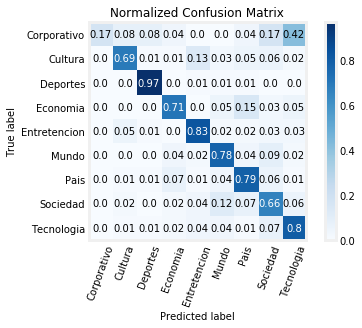

In [29]:
import scikitplot.plotters as skplt
ax = skplt.plot_confusion_matrix(y_test, y_test_hat,normalize=True)
# plt.xticks(rotation=45)

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

plt.xticks(rotation=70)